<h1> Capstone Project-The Battle of Neighborhoods </h1>
<h3> Applied Data Science Capstone by IBM/Coursera (Week1) </h3>

<hr>

As part of the Final Capstone Project, the course requires us to come up with a business problem and use foursquare and Machine learning techniques to solve it.

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data: Requirement and Collection](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a> (Week1:Part1)

### "Prospects of starting a Restaurant cum Catering service by inspecting the Zones of Chennai"

Chennai being one of the metropolitan areas, is one of the growing IT hubs of India. With a population of 8.7 million people (86,96,010) in an area of 426 $km^2$, the city of Chennai also has a lot of leading industries including automobile, textile, petrochemicals, and hardware manufacturing. All of this makes it a potential place to start a new business. <br>
<br>
While looking for places to open a business, we need to select the busiest zones in Chennai where a constant crowd is guaranteed. In a city like Chennai there will be a huge competition for businesses. Keeping this in mind, the surrounding of the selected zones should not have a lot of similar businesses as ours. Analyzing the office areas of the zones, it is expected that there will be a lot of restaurants. But a catering service is an idea which is not much explored in these areas. So, opening up a catering service which will also operate as a restaurant will be a brilliant idea to try.

While looking for places to open a business, we need to select the busiest zones in Chennai where a constant crowd is guaranteed. In a city like Chennai there will be a huge competition for businesses. Keeping this in mind, the surrounding of the selected zones should not have a lot of similar businesses as ours. Analyzing the office areas of the zones, it is expected that there will be a lot of restaurants. But a catering service is an idea which is not much explored in these areas. So, opening up a catering service which will also operate as a restaurant will be a brilliant idea to try.

The Business Problem can be stated as: 
<h4>“What is the best place to open a Restaurant-cum-Catering Service in Chennai?”</h4>


<img src='http://www.hcmadras.tn.nic.in/image/mhc-twilight-view.jpg'/>

<h3> Target Audience:</h3>

* The primary target audience for this project are definitely the entrepreneurs who want to open up a new business 
* Investors who want to invest in good business ideas
* Offices in the locality of the business who will be interested in a contract-based catering service or employees who are interested in placing a catering order 
* Students who are exploring Data Science and are trying to learn the art of telling a story by training, analyzing and learning from a data 


<h2> Data: Requirements and collection (Week1:Part2) </h2> <a name="data"></a>

To open a business in an area, one needs to analyze the area, based on the average land prices, housing prices, most frequent venues, target audience, the competition and many other factors. <br>
In this project, the data requirements and collection are as below:


1. <b>Zones Data (along with Coordinates)</b>
    * <b>Requirement:</b> There are 15 zones in Chennai with a total of 200 wards. The basic data required to start this project is the names of all these Zones along with their coordinates
    * <b>Collection:</b> Web scape the data of Zones of Chennai using <b>‘BeautifulSoup’</b>. Use <b>‘Python Geocoder’</b> to get the latitude and longitude values of these zones.

2. <b>Professional Venue Data</b>
    * <b>Requirement:</b> From these 15 zones we need to find out which zones have the most professional venues like offices, hospitals, industries, factories etc. In other words, we need to know in which zones we will have a constant flow of people (customers). 
    * <b>Collection:</b> Using <b>‘Foursquare’</b> by giving a specific category ID we can find the most frequent professional venues in these 15 zones.

3. <b>Nearby Venues Data</b>
    * <b>Requirement:</b> We need to have an idea about the competition before we open a business. So, we need data about the most frequent venues nearby each selected zone.
    * <b>Collection:</b> Explore the zones using <b>‘Foursquare’</b> 

4. <b>Pricing Data</b>
    * <b>Requirement:</b> Pricing data will help us in two ways:
        * By giving us an estimate of the price values if you want to buy the land or rent it for the business.
        * By giving us an idea about what kind of resident customers we are dealing with
    * <b>Collection:</b> Websites have pricing data for all zones of Chennai. (It is generally difficult to find accurate pricing data.)


Step by step lets collect the data.

<h4>1. Zones Data (along with Coordinates)</h4>

Data about the zones of Chennai can be obtained [from this website](https://en.wikipedia.org/wiki/List_of_Chennai_Corporation_zones) using Web scraping. [<b>BeautifulSoup</b>](https://beautiful-soup-4.readthedocs.io/en/latest/) is a python library used to scrape data from HTML and XML files. It works along with a parser (lxml parser is being used here).

In [55]:
from bs4 import BeautifulSoup
import requests

To get the source code use the 'get' method.

In [56]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_Chennai_Corporation_zones').text
soup = BeautifulSoup(source, 'lxml')


After inspecting the source code, find the class of the table you want to scrape and identify the rows and columns.

In [57]:
table = soup.find('table', class_ = 'wikitable sortable')
rows = table.find_all('tr')

In [58]:
locations = []
for row in rows:
    col = row.find_all('td')
    col = [x.text.strip() for x in col]
    try:
        locations.append(col[1])
    except:
        locations.append(0)
del locations[0]

Once the column is extracted create a DataFrame out of it.

In [59]:
import pandas as pd
df_chennai = pd.DataFrame()
df_chennai['Location'] = locations
df_chennai

,Location
0,Thiruvottiyur
1,Manali
2,Madhavaram
3,Tondiarpet
4,Royapuram
5,Thiru. Vi. Ka. Nagar
6,Ambattur
7,Anna Nagar
8,Teynampet
9,Kodambakkam


We now got all the zone names. Inorder to get the coordinates of these zones we will use 'Geocoders'.

In [60]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Chennai_explorer")
df_chennai['Latitude']= df_chennai['Location'].apply(geolocator.geocode).apply(lambda x: (x.latitude))

In [61]:
df_chennai['Longitude']= df_chennai['Location'].apply(geolocator.geocode).apply(lambda x: (x.longitude))
df_chennai

,Location,Latitude,Longitude
0,Thiruvottiyur,13.172222,80.304585
1,Manali,32.245461,77.187293
2,Madhavaram,13.142931,80.232517
3,Tondiarpet,13.127767,80.289585
4,Royapuram,13.114619,80.294028
5,Thiru. Vi. Ka. Nagar,13.108472,80.248144
6,Ambattur,13.119375,80.150765
7,Anna Nagar,11.170349,77.351114
8,Teynampet,13.044324,80.249846
9,Kodambakkam,13.049207,80.224283


<h4> 2. Professional Venue Data </h4>

Lets use **Foursquare** to find out which areas have the most professional venues. <br>
To do this, lets get all the professional venues in a radies of 1km from the each zone by using the Profesional venues [category ID](https://developer.foursquare.com/docs/resources/categories).

In [63]:
# The code was removed by Watson Studio for sharing.

In [64]:
Professional_category = '4d4b7105d754a06375d81259'
RADIUS = 1000
LIMIT = 100

def getNearbyProfVenues(names, latitudes, longitudes, radius=RADIUS):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            Professional_category,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        try:    
        # make the GET request
            results = requests.get(url).json()["response"]['venues']
        
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            results = requests.get(url).json()
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zone(Location)', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
        
    return(nearby_venues)

Create a Dataframe out of the venues details.

In [65]:
Chennai_Zones_ProfVenues = getNearbyProfVenues(names=df_chennai['Location'],
                                   latitudes=df_chennai['Latitude'],
                                   longitudes=df_chennai['Longitude']
                                  )

In [66]:
Chennai_Zones_ProfVenues.head()

,Zone(Location),Latitude,Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,Thiruvottiyur,13.172222,80.304585,Aakash Hospital,13.171589,80.304123,Hospital
1,Thiruvottiyur,13.172222,80.304585,Sri Anjaneyar Temple,13.168089,80.310348,Temple
2,Thiruvottiyur,13.172222,80.304585,Sri Pattinathar Temple,13.163456,80.307246,Temple
3,Thiruvottiyur,13.172222,80.304585,Royal Enfield,13.173354,80.307790,Factory
4,Thiruvottiyur,13.172222,80.304585,Angel Broking,13.167497,80.302412,Office


<h4> 4. Nearby Venues Data </h4>

Like we did early, lets use foursquare to explore 1km around the selected zones and collect venue details.

In [72]:

def getNearbyVenues(names, latitudes, longitudes, radius=RADIUS):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zone(Location)', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
        
    return(nearby_venues)


In [73]:
Chennai_6Zones_Venues = getNearbyVenues(names=Selected_zones_df['Location'],
                                   latitudes=Selected_zones_df['Latitude'],
                                   longitudes=Selected_zones_df['Longitude']
                                  )

Use the venue details to create a Dataframe.

In [74]:
Chennai_6Zones_Venues.head()

,Zone(Location),Latitude,Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,Adyar,13.00645,80.257779,Bombay Brassiere,13.006961,80.256419,North Indian Restaurant
1,Adyar,13.00645,80.257779,Cool Biz,13.006632,80.257275,Juice Bar
2,Adyar,13.00645,80.257779,McDonald's,13.006632,80.254255,Burger Joint
3,Adyar,13.00645,80.257779,Prems Graama Bhojanam,13.006345,80.253995,Vegetarian / Vegan Restaurant
4,Adyar,13.00645,80.257779,Adyar Ananda Bhavan,13.005824,80.257368,Indian Restaurant


In [75]:
Chennai_6Zones_Venues.shape[0]

215

<h4> 4. Pricing Data </h4>

Average price per sqft in each selected zone is taken manually from [this website](https://www.99acres.com/property-rates-and-price-trends-in-chennai).

In [83]:

avg_price_per_sqft = {'Adyar':12325,'Alandur':7607,'Ambattur': 4420,'Kodambakkam':7607,'Perungudi':6885,'Teynampet':12792}
avg_price_df= pd.DataFrame.from_dict(avg_price_per_sqft, orient='index')
avg_price_df = avg_price_df.reset_index()
avg_price_df.columns=['Location', 'Avg Price per sqft']

avg_price_df

,Location,Avg Price per sqft
0,Adyar,12325
1,Alandur,7607
2,Ambattur,4420
3,Kodambakkam,7607
4,Perungudi,6885
5,Teynampet,12792


To make more sense of the data, lets plot a bar plot of the data.

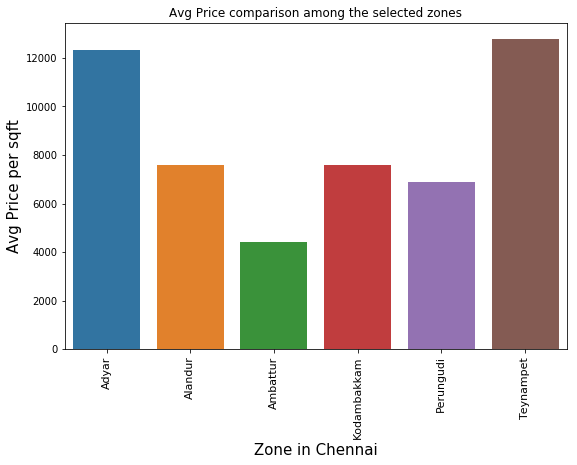

In [84]:
fig = plt.figure(figsize=(9,6))
price_bar = sns.barplot(x='Location',y ='Avg Price per sqft',data=avg_price_df)
price_bar.set_xticklabels(price_bar.get_xticklabels(), rotation=90, fontsize=11)
plt.xlabel('Zone in Chennai',fontsize=15)
plt.ylabel('Avg Price per sqft',fontsize=15)
plt.title('Avg Price comparison among the selected zones')

plt.show()